# **Finding Outliers**
In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.

## Objectives
In this lab, you will perform the following:
-  Analyze the distribution of key variables in the dataset.
-  Identify and remove outliers using statistical methods.
-  Perform relevant statistical and correlation analysis.

#### Install and import the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_10420\932243093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


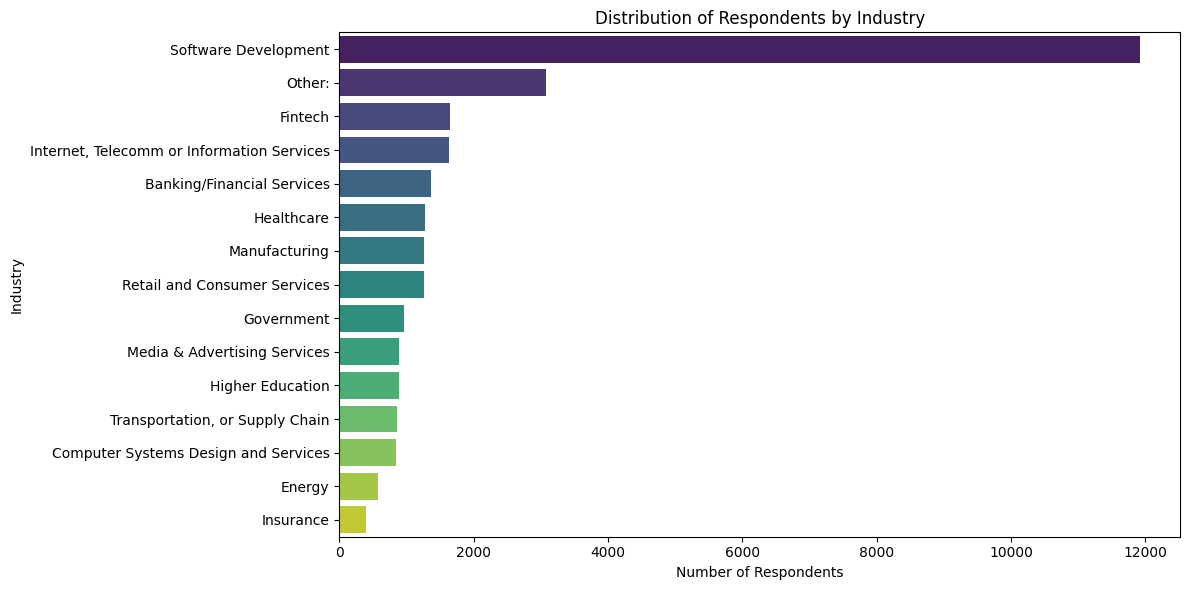

In [3]:
##Write your code here
# Drop missing values in the Industry column
industry_counts = df['Industry'].dropna().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Drop missing values in the compensation column
comp_df = df['ConvertedCompYearly'].dropna()

# Ensure it's numeric
comp_df = pd.to_numeric(comp_df, errors='coerce')

mean_comp = comp_df.mean()
median_comp = comp_df.median()
std_comp = comp_df.std()

# Define outlier threshold as > 3 standard deviations above the mean
threshold = mean_comp + 3 * std_comp

# Filter respondents with compensation above the threshold
high_earners = df[df['ConvertedCompYearly'] > threshold]
print(f"\nNumber of high earners (> 3 std above mean): {len(high_earners)}")
print(high_earners[['ConvertedCompYearly', 'Employment', 'Country', 'JobSat']].head())


Number of high earners (> 3 std above mean): 89
      ConvertedCompYearly           Employment                   Country  \
529              650000.0  Employed, full-time  United States of America   
828             1000000.0  Employed, full-time  United States of America   
1932             945000.0  Employed, full-time  United States of America   
2171             750000.0  Employed, full-time  United States of America   
2187            2000000.0  Employed, full-time                     Gabon   

      JobSat  
529      6.0  
828      8.0  
1932     2.0  
2171     8.0  
2187     NaN  


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [5]:
##Write your code here
# Drop missing or non-numeric values
comp_series = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

# Calculate Q1 and Q3
Q1 = comp_series.quantile(0.25)
Q3 = comp_series.quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = comp_series[(comp_series < lower_bound) | (comp_series > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 978


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Keep rows where ConvertedCompYearly is within the bounds
df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) & 
    (df['ConvertedCompYearly'] <= upper_bound)
].copy()

print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"DataFrame size after outlier removal: {df_no_outliers.shape[0]} rows")
print(f"Number of removed outliers: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame size: 65437 rows
DataFrame size after outlier removal: 22457 rows
Number of removed outliers: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


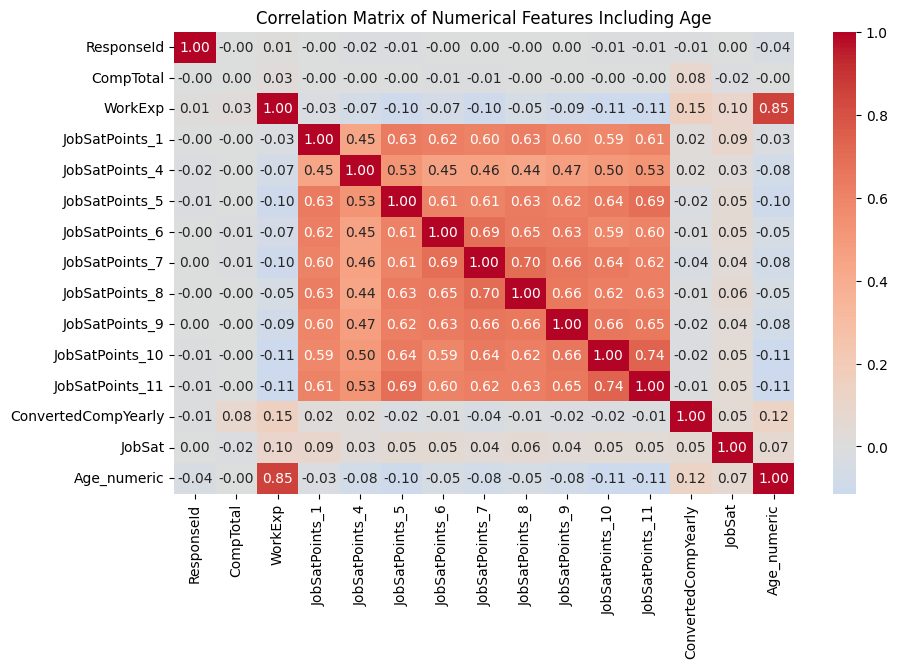

In [7]:
##Write your code here
# use midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Map Age to numeric
df['Age_numeric'] = df['Age'].map(age_mapping)

# Convert all relevant numeric columns to numeric type, ignoring errors
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Add the new Age_numeric column if not already numeric
if 'Age_numeric' not in numeric_cols:
    numeric_cols.append('Age_numeric')

# Subset DataFrame for correlation analysis
numeric_df = df[numeric_cols].copy()

corr_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 6))

# Visualize full correlation matrix with heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Numerical Features Including Age')
plt.show()

## Summary
In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:
- Loaded and explored the dataset to understand its structure.
- Analyzed the distribution of respondents across industries.
- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.
- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.

Copyright © IBM Corporation. All rights reserved.
